# ВИБРОСВОДКА по замерам ГПА по ГТУ и ЦБН (V,мм\с и S, мкм) 
1. Сводка ГПА по цеху и заданному периоду с макс уровнем вибрации в цеху. 
2. Выборка замеров с ГПА из п.1.
3. Построение графиков ГПА по п.1 за всю историю измерений.  

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

data1 = pd.read_csv("d:\GitHub\Advance-Py\Замеры_VDO.csv", na_values="NA", delimiter=";")
#data1 = data1[data1["Дата"] != ""]
#print(data1.head)

# Моем датасет data1
print("Кол-во строк с пустыми Датами =", data1['Дата'].isnull().sum())
data1 = data1[data1["Дата"] != ""]
data1 = data1[~data1['Дата'].isnull()] # отбрасываем строки  с пустыми ячейками (моем датасет)
data1 = data1[data1['Дата'].notna()] # отбрасываем строки  с NA значениями (моем датасет)
data1 = data1[data1["Дата"] != ""]
print("Кол-во строк с пустыми Датами =", data1['Дата'].isnull().sum())
data1["Дата"] = pd.to_datetime(data1["Дата"])  # присваиваем формат datatime колонке 'Дата'
#data1 = data1[data1['Дата']].sort_values
print("Кол-во строк с Датами >2022.03.01 =", data1[data1['Дата']>"2022.04.01"]) # тестим вывод по дате 
print(data1[data1['Дата']>"2022.04.01"].count())
#print(data1.head)

Кол-во строк с пустыми Датами = 107
Кол-во строк с пустыми Датами = 0
Кол-во строк с Датами >2022.03.01 =       Ст_№_ГПА                Дата  ГТУ1_В  ГТУ1_Г  ГТУ1_О  ГТУ2_В  ГТУ2_Г  \
5456        51 2022-04-05 11:00:00     5.8     6.9     4.2     4.5     3.9   
5457        51 2022-04-05 11:00:00     7.8     8.0     4.3     5.2     4.0   
5458        51 2022-04-05 11:00:00     6.8     7.8     5.2     4.8     4.0   

      ГТУ2_О  ГТУ3_В  ГТУ3_Г  ...  ЦБН4_3  ЦБН4_Рвх  ЦБН4_Рвых  Оценка_ГТУ  \
5456     3.5     5.0     4.9  ...  4900.0     50.37      69.75      хорошо   
5457     3.3     5.1     4.6  ...  4800.0     50.48      69.65    удовлет.   
5458     2.8     4.8     4.1  ...  4700.0     50.58      69.65      хорошо   

      Оценка_ЦБН  Оценка_ГПА                                          Прибор  \
5456     отлично      хорошо  СКВ: SKF-GX,№71014 /ИВ-Д-ПФ-17М; АСТД-2М ЦБН /   
5457     отлично    удовлет.  СКВ: SKF-GX,№71014 /ИВ-Д-ПФ-17М; АСТД-2М ЦБН /   
5458     отлично      хорошо

In [3]:
# Объединяем сет замеры и сет филиалы по столбцу "Ст_№_ГПА"
data1 = data1.set_index(["Ст_№_ГПА"])
#print(data1.head)
data2 = pd.read_csv("d:\GitHub\Advance-Py\Филиал.csv", na_values="NA", delimiter=";")
data2 = data2.set_index(["Ст_№_ГПА"])
#print(data2.head)
data = pd.merge(data1, data2, left_index=True, right_index=True)  # объединяем сет замеры и сет филиалы по столбцу "Ст_№_ГПА"
#print(data.head(5))
data = data.reset_index()
data = data.set_index("Цех")
data = data.sort_index()
#print(data.head(5))
# print (data["Ст_№_ГПА"][0:1])
#data.to_csv('merge Замеры-Филиал.csv')
#data.to_csv('merge Замеры-Филиал без индекса.csv', index=False)
# data = data.drop(columns=data.iloc[:, 2:len(data.columns)])
# print(data.head)

# Добавим столбцы 'Макс_ГТУ', 'Макс_V_ЦБН', 'Макс_S_ЦБН' с макс значениями для каждого узла ГПА (по номерам ячеек в строках)

In [4]:
df = data
df = data.reset_index()
print(df.head(3))
#print(df.iloc[[0, 1, 2], [3,4,5,6,7,8,9,10,11]])
print(df.iloc[[0, 1, 2], [3,4,5,6,7,8,9,10,11]].max(1)) # тестим и находим Макс_V_ГТУ из нескольких значений по строке

     Цех  Ст_№_ГПА                Дата  ГТУ1_В  ГТУ1_Г  ГТУ1_О  ГТУ2_В  \
0  Цех_1        11 2002-11-10 10:00:00     3.5     1.8     1.1     1.8   
1  Цех_1        11 2003-01-15 10:00:00     1.2     1.2     0.8     1.1   
2  Цех_1        11 2003-02-26 10:00:00     1.3     1.2     1.1     1.2   

   ГТУ2_Г  ГТУ2_О  ГТУ3_В  ...  Оценка_ГПА    Прибор      ЧД_Гц  \
0     1.3     1.1     3.0  ...      хорошо       NaN        NaN   
1     1.0     0.7     3.3  ...      хорошо       NaN        NaN   
2     1.1     0.9     3.7  ...      хорошо  №764/986  10 - 1000   

   Наработка_ГТУ_ч  Примечание              Филиал     КС   Тип_ГПА  \
0              NaN         NaN  Приводинское ЛПУМГ  КС-14  ГТ-750-6   
1              NaN         NaN  Приводинское ЛПУМГ  КС-14  ГТ-750-6   
2              NaN         NaN  Приводинское ЛПУМГ  КС-14  ГТ-750-6   

       Тип_ГТУ     Тип_ЦБК  
0  ГТ 750-6 А2  Н-370-17-1  
1  ГТ 750-6 А2  Н-370-17-1  
2  ГТ 750-6 А2  Н-370-17-1  

[3 rows x 49 columns]
0    3.5
1

In [5]:
#df = df.reset_index()
#df = df.drop(columns = 'index')
#df = df.drop(columns = 'level_0')
#print(df)
df['Макс_ГТУ'] = df.iloc[[(i) for i in range(0, len(df.index))], [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]].max(1) # находим Макс_V_ГТУ из 18 знач по строке
df['Макс_V_ЦБН'] = df.iloc[[(i) for i in range(0, len(df.index))], [21, 22, 23, 24, 25, 26]].max(1)  # находим Макс_V_ЦБН из 6 знач по строке
df['Макс_S_ЦБН'] = df.iloc[[(i) for i in range(0, len(df.index))], [27, 28, 29, 30, 31]].max(1) # находим Макс_S_ЦБН из 5 знач по строке
print(df[['Цех','Ст_№_ГПА','Макс_ГТУ','Макс_V_ЦБН','Макс_S_ЦБН']]) # результат - столбцы с макс знач по узлу и по виду измерения (V-скорость, S-перемещение)

        Цех  Ст_№_ГПА  Макс_ГТУ  Макс_V_ЦБН  Макс_S_ЦБН
0     Цех_1        11       3.5         1.2         NaN
1     Цех_1        11       3.3         1.4         NaN
2     Цех_1        11       3.7         1.0         NaN
3     Цех_1        11       4.3         1.3         NaN
4     Цех_1        11       3.6         3.4         NaN
...     ...       ...       ...         ...         ...
6467  Цех_7        74       7.8         NaN        65.0
6468  Цех_7        74       8.1         NaN        75.0
6469  Цех_7        74       7.7         NaN        71.0
6470  Цех_7        74       8.2         NaN        65.0
6471  Цех_7        74       8.5         NaN        65.0

[6472 rows x 5 columns]


# Сводка по ГПА c максимальным ур вибрации

In [6]:
# Выборка по датам в Сводку по замерам за период = мес, например март 2022.03.01 - 2022.03.31  
start='2022.03.01' # 'введите дату начала выборки'
finish='2022.03.31'  # 'введите дату конца выборки'
df_copy = df.copy(deep=True)
df_copy = df_copy.reset_index()
df_copy = df_copy.set_index("Дата")
df_copy = df_copy.sort_index()
print(df_copy)
df = df[(df['Дата']>=start) & (df['Дата']<=finish)]
print('Кол-во замеров ГПА за период ('+start+' - '+finish+') =', df['Дата'].count())
print('Кол-во уник. ГПА за тот же период =', len(df['Ст_№_ГПА'].unique()))

                     index       Цех  Ст_№_ГПА  ГТУ1_В  ГТУ1_Г  ГТУ1_О  \
Дата                                                                     
2000-10-25 10:00:00   2950  Цех_3бис        37     2.1     0.4     0.6   
2001-05-30 10:00:00   2138     Цех_3        33     3.8     1.3     0.8   
2001-07-18 10:00:00   2139     Цех_3        33     3.5     1.7     0.8   
2001-08-21 10:00:00   2140     Цех_3        33     4.0     1.9     1.3   
2002-05-30 10:00:00   3740     Цех_4        42     2.4     2.9     5.4   
...                    ...       ...       ...     ...     ...     ...   
2022-03-28 17:00:00   3281  Цех_3бис        37     3.0     2.5     1.9   
2022-03-29 15:00:00   5211     Цех_4        48    11.1    10.1    10.9   
2022-04-05 11:00:00   5373     Цех_5        51     5.8     6.9     4.2   
2022-04-05 11:00:00   5374     Цех_5        51     7.8     8.0     4.3   
2022-04-05 11:00:00   5375     Цех_5        51     6.8     7.8     5.2   

                     ГТУ2_В  ГТУ2_Г  

# Выводим сводку ГПА с ГТУ с макс знач в csv файл 
"Сводка замеры Макс_ГТУ по цеху.csv"

(Листок 'Оценка_ГПА','Оценка_ГТУ','Оценка_ЦБН','Филиал','Цех','Тип_ГПА', 'Тип_ГТУ', 'Тип_ЦБК', 'Ст_№_ГПА', 'Дата','Макс_ГТУ','Макс_V_ЦБН','Макс_S_ЦБН' ) 

In [7]:
#df = df.reset_index()
#df = df.drop(columns = 'index')
groups = df.groupby(by='Цех')
#groups = df.groupby('Цех')
#print(groups.apply(lambda g: g[g['Макс_ГТУ']==g['Макс_ГТУ'].max()]))  # находим макс значения по "ГТУ" внури каждой группы "Цех"
gr_max_GTU = groups.apply(lambda g: g[g['Макс_ГТУ']==g['Макс_ГТУ'].max()])
gr_max_GTU.to_csv('d:\GitHub\Advance-Py\Мой проект\Группа замеры ГПА с макс знач ГТУ по цеху '+str(start)+' - '+str(finish)+'.csv')
#print(gr_max_CNB_V_GTU.index)
gr_max_GTU['index'] = gr_max_GTU.index.levels[1]
gr_max_GTU = gr_max_GTU.reset_index(drop=True)
gr_max_GTU = gr_max_GTU.set_index('index')

gr_svod_GTU = gr_max_GTU[['Ст_№_ГПА','Оценка_ГПА','Оценка_ГТУ','Оценка_ЦБН','Филиал','Цех','Тип_ГПА', 'Тип_ГТУ', 'Тип_ЦБК', 'Ст_№_ГПА', 'Макс_ГТУ','Макс_V_ЦБН','Макс_S_ЦБН']]
gr_svod_GTU.to_csv('d:\GitHub\Advance-Py\Мой проект\Сводка замеры Макс_ГТУ по цеху '+str(start)+' - '+str(finish)+'.csv')
# print(gr_svod_GTU.head)

# Выводим сводку ГПА с ЦБН по Макс_V_ЦБН в csv файл
(V-виброскорость)

"Сводка замеры Макс_V_ЦБН по цеху 2022.03.01 - 2022.03.31.csv"
(Листок 'Оценка_ГПА','Оценка_ГТУ','Оценка_ЦБН', 'Филиал','Цех','Тип_ГПА', 'Тип_ГТУ', 'Тип_ЦБК', 'Ст_№_ГПА', 'Дата','Макс_ГТУ','Макс_V_ЦБН','Макс_S_ЦБН' ) 

In [8]:
groups = df.groupby(by='Цех')
#print(groups.apply(lambda g: g[g['Макс_V_ЦБН']==g['Макс_V_ЦБН'].max()]))  # находим макс значения по "ЦБК" внури каждой группы "Цех"
gr_max_CBN_V = groups.apply(lambda g: g[g['Макс_V_ЦБН']==g['Макс_V_ЦБН'].max()])
gr_max_CBN_V.to_csv('d:\GitHub\Advance-Py\Мой проект\Группа замеры ГПА с макс знач ЦБН по цеху '+str(start)+' - '+str(finish)+'.csv')
#print(gr_max.index)
gr_max_CBN_V['index'] = gr_max_CBN_V.index.levels[1]
gr_max_CBN_V = gr_max_CBN_V.reset_index(drop=True)
gr_max_CBN_V = gr_max_CBN_V.set_index('index')

gr_svod_CBN_V = gr_max_CBN_V[['Ст_№_ГПА','Оценка_ГПА','Оценка_ГТУ','Оценка_ЦБН','Филиал','Цех','Тип_ГПА','Тип_ГТУ','Тип_ЦБК','Дата','Макс_ГТУ','Макс_V_ЦБН','Макс_S_ЦБН']]
# выборка из по дате - весь период -2002-2022
gr_svod_CBN_V.to_csv('d:\GitHub\Advance-Py\Мой проект\Сводка замеры Макс_V_ЦБН по цеху '+str(start)+' - '+str(finish)+'.csv')
print(gr_svod_CBN_V.head)

<bound method NDFrame.head of        Ст_№_ГПА Оценка_ГПА Оценка_ГТУ Оценка_ЦБН              Филиал  \
index                                                                  
167          11     хорошо     хорошо     хорошо  Приводинское ЛПУМГ   
977          21     хорошо     хорошо    отлично  Приводинское ЛПУМГ   
3281         37     удовл.    отлично     удовл.  Приводинское ЛПУМГ   
5211         48     удовл.     удовл.     хорошо  Приводинское ЛПУМГ   

            Цех   Тип_ГПА      Тип_ГТУ           Тип_ЦБК                Дата  \
index                                                                          
167       Цех_1  ГТ-750-6  ГТ 750-6 А2        Н-370-17-1 2022-03-28 09:00:00   
977       Цех_2    ГТК-10     ГТК-10-4        Н-520-12-1 2022-03-28 09:00:00   
3281   Цех_3бис  ГТН-16М1    ГТН-16М-1  2Н-16-76-1,44М-1 2022-03-28 17:00:00   
5211      Цех_4    ГПУ-10        ДР59Л        Н-370-18-1 2022-03-29 15:00:00   

       Макс_ГТУ  Макс_V_ЦБН  Макс_S_ЦБН  
index         

# Выводим сводку ГПА с ЦБН по Макс_S_ЦБН в csv файл 
"Сводка замеры Макс_S_ЦБН по цеху.csv"

(Листок 'Оценка_ГПА','Оценка_ГТУ','Оценка_ЦБН', 'Филиал','Цех','Тип_ГПА', 'Тип_ГТУ', 'Тип_ЦБК', 'Ст_№_ГПА', 'Дата','Макс_ГТУ','Макс_V_ЦБН','Макс_S_ЦБН' ) 

In [9]:
groups = df.groupby(by='Цех')
#print(groups.apply(lambda g: g[g['Макс_S_ЦБН']==g['Макс_S_ЦБН'].max()]))  # находим макс значения по "ЦБК" внури каждой группы "Цех"
gr_max_CBN_S = groups.apply(lambda g: g[g['Макс_S_ЦБН']==g['Макс_S_ЦБН'].max()])
gr_max_CBN_S.to_csv('d:\GitHub\Advance-Py\Мой проект\Группа замеры ГПА с Макс_S_ЦБН по цеху '+str(start)+' - '+str(finish)+'.csv')
#print(gr_max.index)
gr_max_CBN_S['index'] = gr_max_CBN_S.index.levels[1]
gr_max_CBN_S = gr_max_CBN_S.reset_index(drop=True)
gr_max_CBN_S = gr_max_CBN_S.set_index('index')

gr_svod_CBN_S = gr_max_CBN_S[['Ст_№_ГПА','Оценка_ГПА','Оценка_ГТУ','Оценка_ЦБН','Филиал','Цех','Тип_ГПА','Тип_ГТУ','Тип_ЦБК','Ст_№_ГПА','Макс_ГТУ','Макс_V_ЦБН','Макс_S_ЦБН']]
# выборка из по дате - весь период -2002-2022
gr_svod_CBN_S.to_csv('d:\GitHub\Advance-Py\Мой проект\Сводка замеры Макс_S_ЦБН по цеху '+str(start)+' - '+str(finish)+'.csv')
#print(gr_svod_CBN_S.head)

# Построим графики
 по ГПА с маск. ур по ГТУ и по ЦБН за весь период 2002-2022гг

In [10]:
#df_copy.to_csv('d:\GitHub\Advance-Py\Мой проект\df_copy.csv')
#df_copy = df_copy.reset_index(drop=True)
#df_copy = df_copy.set_index('Дата')  # дату в индекс для построения графиков на оси времени
#df_copy.sort_index

print(df_copy)

                     index       Цех  Ст_№_ГПА  ГТУ1_В  ГТУ1_Г  ГТУ1_О  \
Дата                                                                     
2000-10-25 10:00:00   2950  Цех_3бис        37     2.1     0.4     0.6   
2001-05-30 10:00:00   2138     Цех_3        33     3.8     1.3     0.8   
2001-07-18 10:00:00   2139     Цех_3        33     3.5     1.7     0.8   
2001-08-21 10:00:00   2140     Цех_3        33     4.0     1.9     1.3   
2002-05-30 10:00:00   3740     Цех_4        42     2.4     2.9     5.4   
...                    ...       ...       ...     ...     ...     ...   
2022-03-28 17:00:00   3281  Цех_3бис        37     3.0     2.5     1.9   
2022-03-29 15:00:00   5211     Цех_4        48    11.1    10.1    10.9   
2022-04-05 11:00:00   5373     Цех_5        51     5.8     6.9     4.2   
2022-04-05 11:00:00   5374     Цех_5        51     7.8     8.0     4.3   
2022-04-05 11:00:00   5375     Цех_5        51     6.8     7.8     5.2   

                     ГТУ2_В  ГТУ2_Г  

In [11]:
# График для ГТУ
#fig = plt.figure(figsize=(12, 12))
#area = fig.add_subplot(2, 1, 1)
#area.set_title("Тренды вибрации по ГТУ", fontsize=20)
#area2 = area.twinx()
#graf_gtu['Макс_ГТУ'].plot(ax=ax, color="red")
#area2.set_ylabel("Молодежь", color="red")
#area.legend(["Ст_№_ГПА 11", "Ст_№_ГПА 23"])
#plt.show()

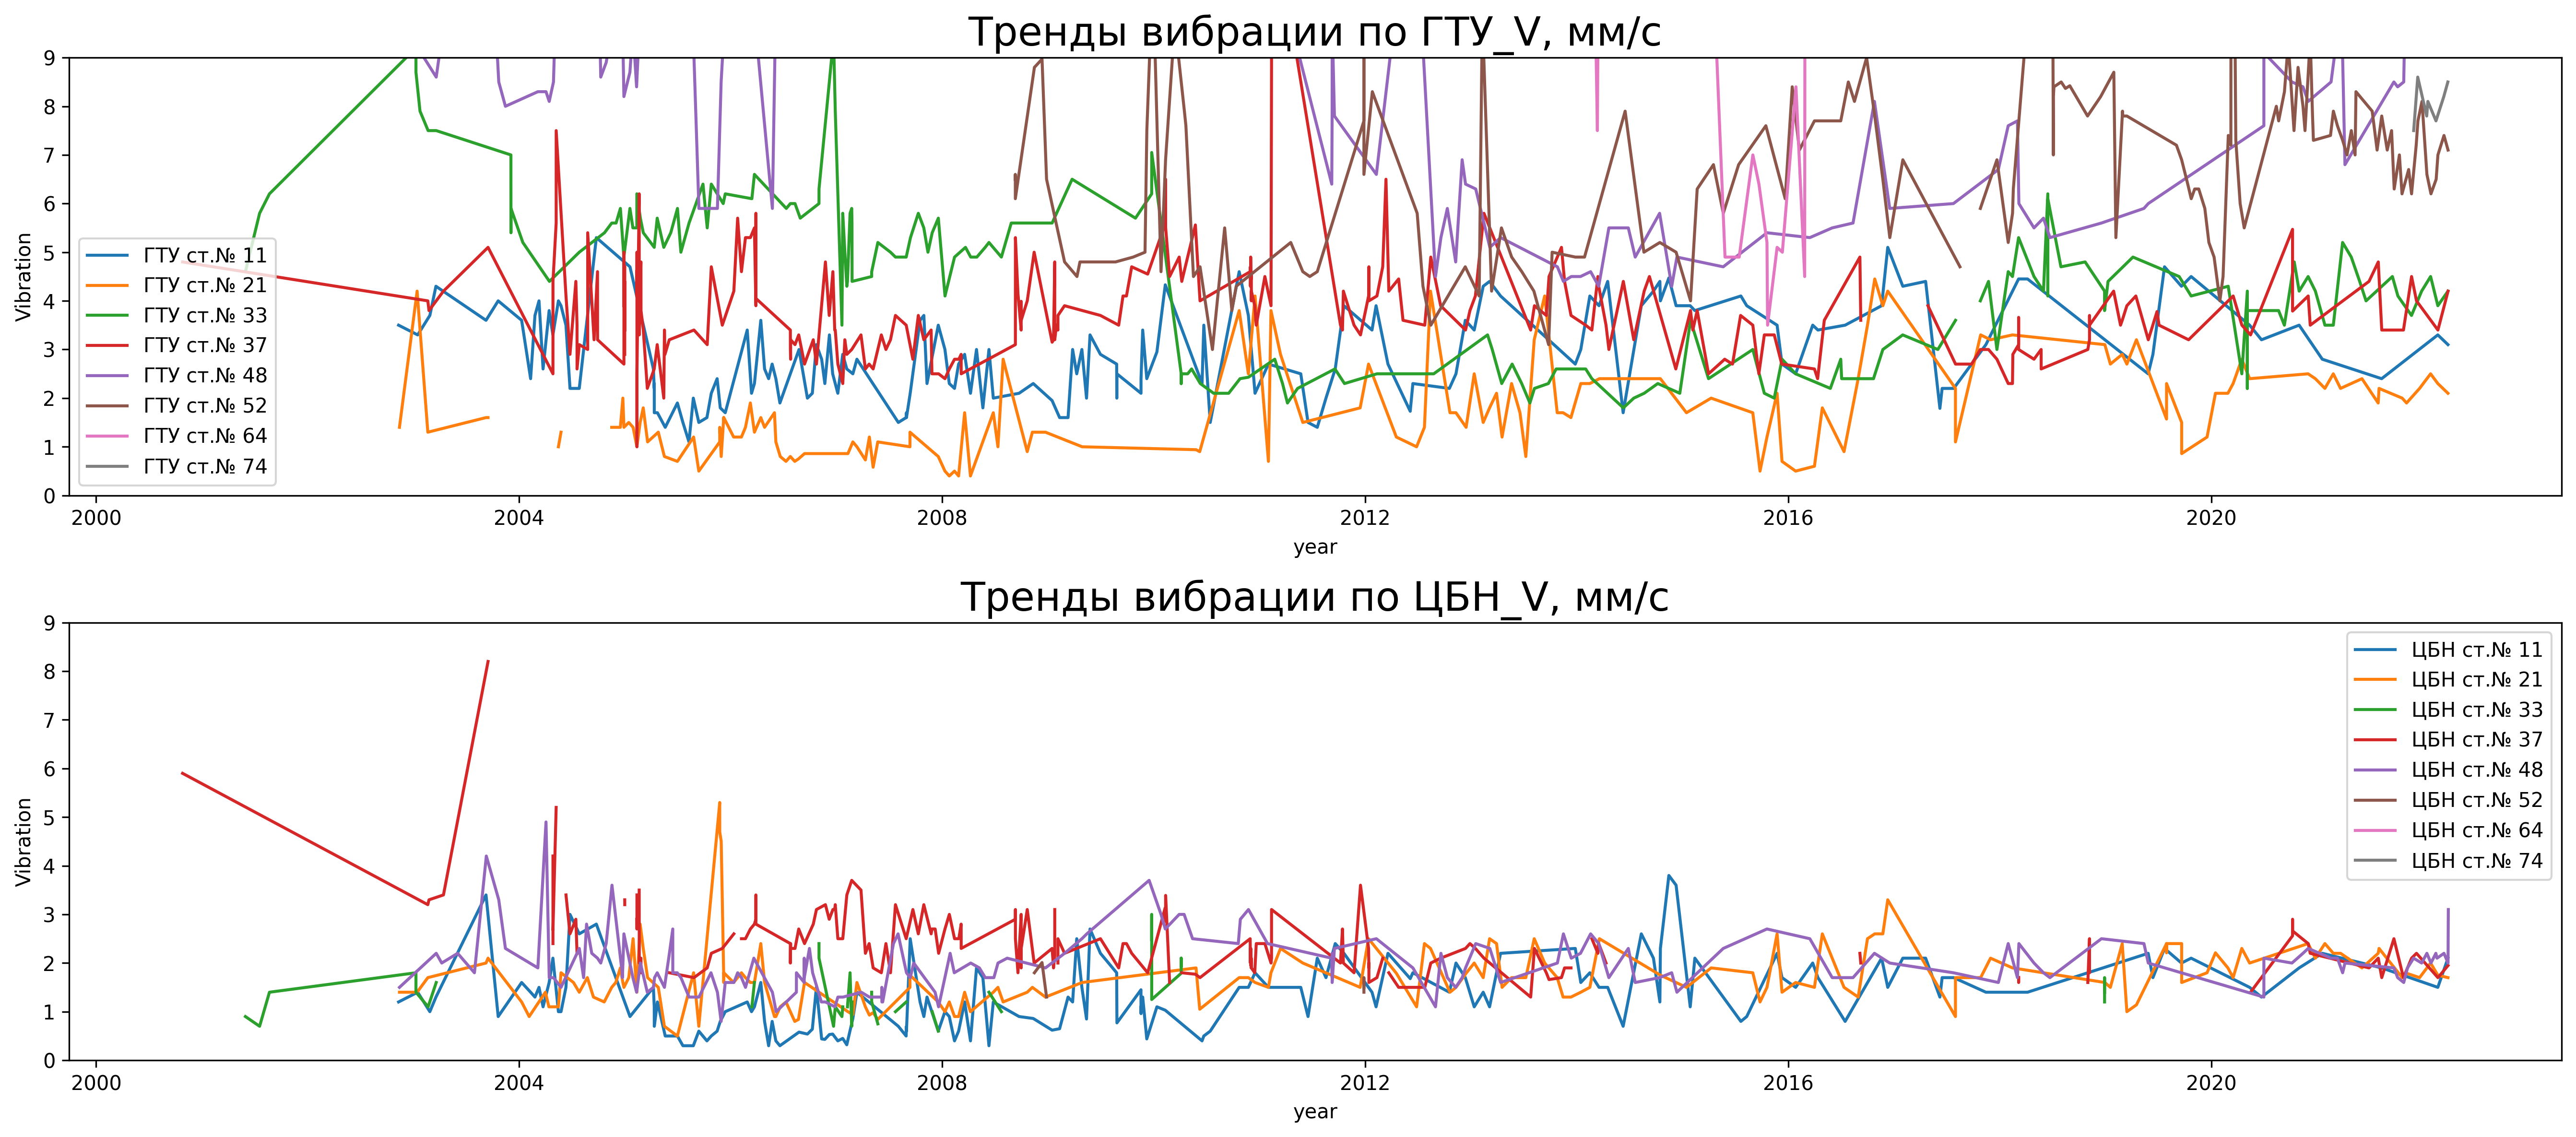

In [17]:
# График ГТУ
def vibr_plot(x, y, i, j, color='black'):
    ax[0,0].set_title("Тренды вибрации по ГТУ_V, мм/с", fontsize=20)
    series = pd.Series(gr_max_GTU['Ст_№_ГПА'])
    for N_gpa in series:
        df_vibro = df_copy[df_copy['Ст_№_ГПА']== N_gpa]
        ax[0, 0].plot(df_copy[df_copy['Ст_№_ГПА']== N_gpa].index, df_vibro['Макс_ГТУ'] ,label='ГТУ ст.№ '+str(N_gpa))
            
    ax[0, 0].set_xlabel("year")
    ax[0, 0].set_ylabel("Vibration")
    ax[0, 0].legend(loc='best')

fig, ax = plt.subplots(2, 1, figsize = (18,8), sharey=True, squeeze=False, dpi=300)
vibr_plot()
# ax[1,0].xaxis.set_major_locator(plt.MultipleLocator(365))
#area.set_ylabel("Виброскорость, мм/с", color="blue")


ax[1,0].set_title("Тренды вибрации по ЦБН_V, мм/с", fontsize=20)
for N_gpa in series:
    df_vibro = df_copy[df_copy['Ст_№_ГПА']== N_gpa]
    ax[1, 0].plot(df_copy[df_copy['Ст_№_ГПА']== N_gpa].in dex, df_vibro['Макс_V_ЦБН'] ,label='ЦБН ст.№ '+str(N_gpa))
    
ax[1, 0].set_xlabel("year")
ax[1, 0].set_ylabel("Vibration")
ax[1, 0].legend(loc='best')
plt.ylim(0, 9)


plt.tight_layout()
plt.show()

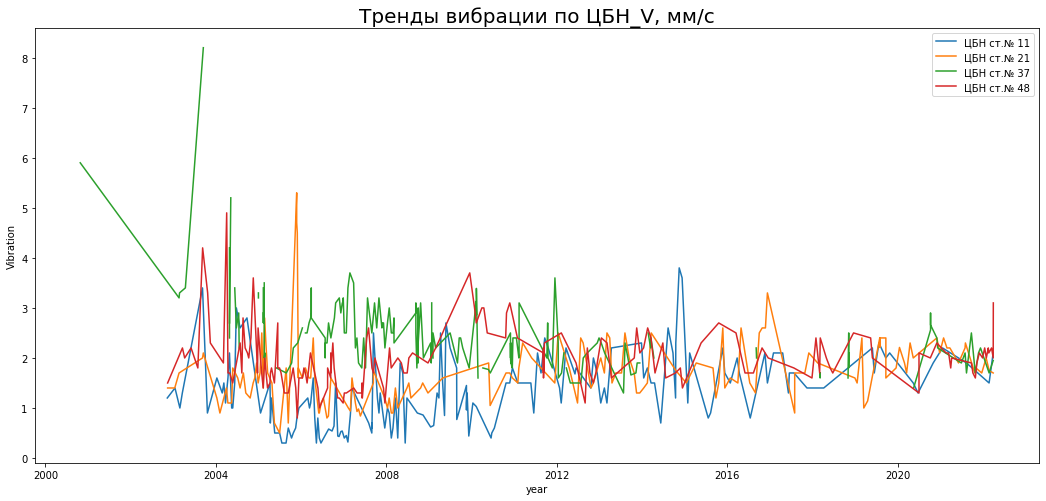

In [ ]:
# График ЦБН_V
fig,ax = plt.subplots(figsize = (18,8))
ax.set_title("Тренды вибрации по ЦБН_V, мм/с", fontsize=20)
#area = fig.add_subplot(16, 1, 1)
#area.set_title("Тренды вибрации по ГТУ", fontsize=20)
#area.set_ylabel("Виброскорость, мм/с", color="blue")

series = pd.Series(gr_max_CBN_V['Ст_№_ГПА'])
for N_gpa in series:
#for name in [11, 23, 46]:
    df_vibro = df_copy[df_copy['Ст_№_ГПА']== N_gpa]
    ax.plot(df_copy[df_copy['Ст_№_ГПА']== N_gpa].index, df_vibro['Макс_V_ЦБН'] ,label='ЦБН ст.№ '+str(N_gpa))
    
ax.set_xlabel("year")
ax.set_ylabel("Vibration")
ax.legend(loc='best')
plt.show()

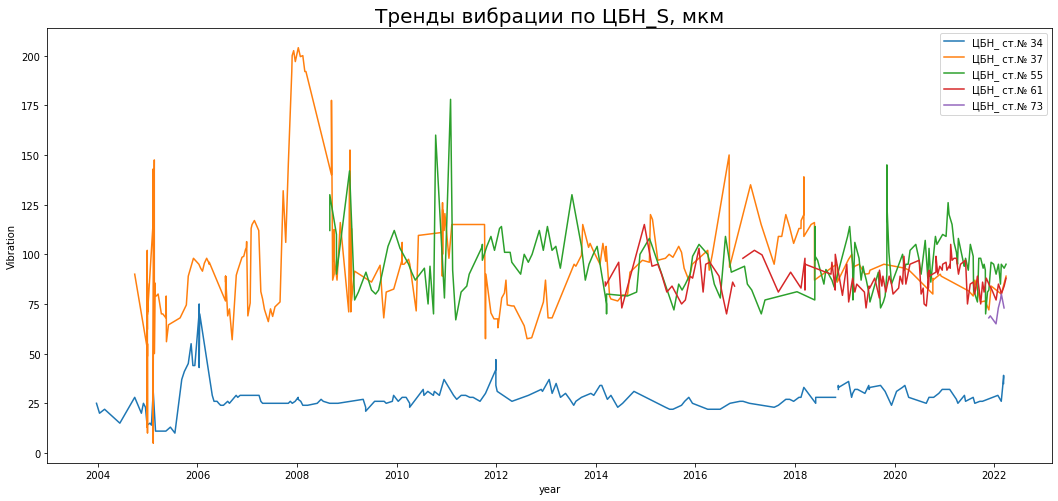

In [ ]:
# График ЦБН_S
#area = fig.add_subplot(1, 1, 1)
fig,ax = plt.subplots(figsize = (18,8))
ax.set_title("Тренды вибрации по ЦБН_S, мкм", fontsize=20)
#area.set_ylabel("Виброскорость, мм/с", color="blue")

series = pd.Series(gr_max_CBN_S['Ст_№_ГПА'])
for N_gpa in series:
#for name in [11, 23, 46]:
    df_vibro = df_copy[df_copy['Ст_№_ГПА']== N_gpa]
    ax.plot(df_copy[df_copy['Ст_№_ГПА']== N_gpa].index, df_vibro['Макс_S_ЦБН'] ,label='ЦБН_ ст.№ '+str(N_gpa))
    
ax.set_xlabel("year")
ax.set_ylabel("Vibration")
ax.legend(loc='best')
plt.show()